# Gráficas del data set de covid en Colombia

In [1]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt

In [2]:
import warnings
warnings.filterwarnings('ignore')

In [3]:
covid_df = pd.read_csv('Casos_positivos_de_COVID-19_en_Colombia.csv')

Limpiamos la data a analizar

In [7]:
covid_df['Sexo'].value_counts()

F    2546146
M    2306177
Name: Sexo, dtype: int64

In [5]:
covid_df['Sexo']=covid_df['Sexo'].str.upper()

In [9]:
covid_df['Estado'].value_counts()

LEVE         4692493
FALLECIDO     122953
MODERADO       17608
GRAVE           2585
Name: Estado, dtype: int64

In [8]:
covid_df['Estado']=covid_df['Estado'].str.upper()

In [12]:
covid_df['Recuperado'].value_counts()

RECUPERADO    4668790
FALLECIDO      122953
ACTIVO          46461
Name: Recuperado, dtype: int64

In [11]:
covid_df['Recuperado']=covid_df['Recuperado'].str.upper()

In [16]:
covid_df['Tipo de contagio'].value_counts()

EN ESTUDIO     3163614
COMUNITARIA     973760
RELACIONADO     711851
IMPORTADO         3098
Name: Tipo de contagio, dtype: int64

In [14]:
covid_df['Tipo de contagio']=covid_df['Tipo de contagio'].str.upper()

In [15]:
covid_df['Nombre del grupo étnico'].value_counts()

Por definir                                   17171
ZENU                                           7684
Sin Comunidad                                  7055
PIJAO                                          3501
PASTO                                          2540
                                              ...  
WOUKUCTO                                          1
YARALIWOU                                         1
LA FLORIDA PIRACUARA PAPURI -ZONA ACAZUNIP        1
PIEDRA ALTA                                       1
SAUNDE GUIGUAY                                    1
Name: Nombre del grupo étnico, Length: 1676, dtype: int64

In [17]:
covid_df['Nombre del grupo étnico']=covid_df['Nombre del grupo étnico'].str.upper()

In [18]:
covid_df['Nombre municipio'].value_counts()

BOGOTA                      1429091
MEDELLIN                     394549
CALI                         268583
BARRANQUILLA                 196267
CARTAGENA                    120417
                             ...   
PAPUNAUA (MORICHAL) (CD)          1
momil                             1
Guepsa                            1
MEDELLiN                          1
Galapa                            1
Name: Nombre municipio, Length: 1046, dtype: int64

In [19]:
covid_df['Nombre municipio']=covid_df['Nombre municipio'].str.upper()

In [20]:
covid_df['Nombre departamento']=covid_df['Nombre departamento'].str.upper()

In [23]:
covid_df['Tipo de recuperación'].value_counts()

TIEMPO    4092290
PCR        576500
Name: Tipo de recuperación, dtype: int64

In [22]:
covid_df['Tipo de recuperación']=covid_df['Tipo de recuperación'].str.upper()

In [24]:
covid_df['Ubicación del caso'].value_counts()

Casa            4677480
Fallecido        122953
Hospital          17608
casa              15006
Hospital UCI       2585
CASA                  7
Name: Ubicación del caso, dtype: int64

In [25]:
covid_df['Ubicación del caso']=covid_df['Ubicación del caso'].str.upper()

In [26]:
covid_df['Unidad de medida de edad'].value_counts()

1    4836921
2      13859
3       1543
Name: Unidad de medida de edad, dtype: int64

In [27]:
covid_df.to_csv('covid_colombia.csv')

Graficas

In [28]:
df = covid_df.groupby(['Nombre departamento'])['ID de caso'].count()
df = df.sort_values(ascending=False)
lista = list(df[range(5)].index)
lista

['BOGOTA', 'ANTIOQUIA', 'VALLE', 'CUNDINAMARCA', 'SANTANDER']

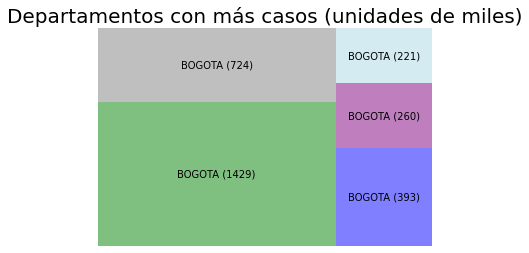

In [29]:
import squarify

squarify.plot(
    sizes=df[range(5)],
    label=["{} ({})".format(k, int(v/1000)) for k in df.index for v in df],
    color=['green','grey','blue','purple','lightblue'],
    alpha=0.5,
)
plt.axis("off")
plt.title("Departamentos con más casos (unidades de miles)", fontsize=20)
plt.show()

In [30]:
#df = covid_df.filter(covid_df['Nombre departamento'].isin(list(lista)))
df = covid_df.groupby(['Nombre departamento'])['ID de caso'].count().reset_index()
df.columns = ['departamento','casos']
df = df[df['departamento'].isin(list(lista))].sort_values(['casos'])
df['totales'] = df['casos'].sum()
df['porcentaje'] = df['casos']/df['totales'] * 100
df

,departamento,casos,totales,porcentaje
29,SANTANDER,221838,3028981,7.323849
16,CUNDINAMARCA,260315,3028981,8.594144
33,VALLE,393111,3028981,12.978325
1,ANTIOQUIA,724626,3028981,23.923095
5,BOGOTA,1429091,3028981,47.180586


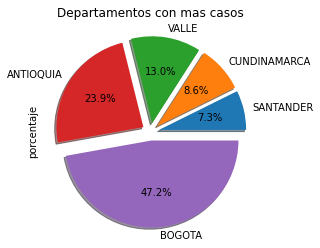

In [31]:
df.index = df['departamento']
df.plot.pie(y='porcentaje', title="Departamentos con mas casos", legend=False, 
            autopct='%1.1f%%', explode=(0.1, 0.1, 0.1, 0.1, 0.1), 
            shadow=True, startangle=0)
plt.show()

In [32]:
#df = covid_df.filter(covid_df['Nombre departamento'].isin(list(lista)))
df = covid_df.groupby(['Tipo de contagio'])['ID de caso'].count().reset_index()
df.columns = ['contagio','casos']
df = df.sort_values(['casos'])
df['totales'] = df['casos'].sum()
df['porcentaje'] = df['casos']/df['totales'] * 100
df

,contagio,casos,totales,porcentaje
2,IMPORTADO,3098,4852323,0.063846
3,RELACIONADO,711851,4852323,14.670314
0,COMUNITARIA,973760,4852323,20.067914
1,EN ESTUDIO,3163614,4852323,65.197927


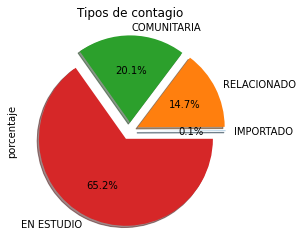

In [34]:
df.index = df['contagio']
df.plot.pie(y='porcentaje', title="Tipos de contagio", legend=False, 
            autopct='%1.1f%%', explode=(0.1, 0.1, 0.1, 0.1), 
            shadow=True, startangle=0)
plt.show()

<AxesSubplot:xlabel='y(t)', ylabel='y(t + 1)'>

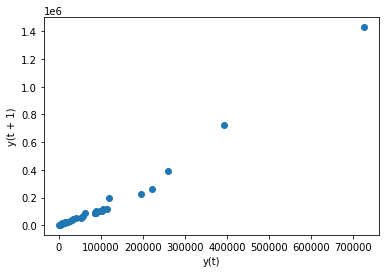

In [43]:
df = covid_df.groupby(['Nombre departamento'])['ID de caso'].count().reset_index()
df.columns = ['departamento','casos']
df = df.sort_values(['casos'])
df.index = df['departamento']
pd.plotting.lag_plot(df['casos'], lag=1)


In [44]:
type(df)

pandas.core.frame.DataFrame

<AxesSubplot:ylabel='Frequency'>

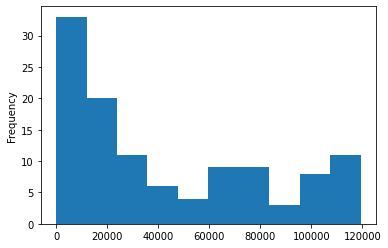

In [42]:
df = covid_df['Edad'].value_counts()
df.plot.hist()